In [1]:
import serial
import time
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

ser = serial.Serial('/dev/ttyUSB1', 1000000)
print (ser.name)


def readi2c(ser, addr):
    ser.reset_input_buffer()
    ser.write(bytearray.fromhex('00'))
    time.sleep(0.001)
    ser.write(bytearray.fromhex(addr))
    time.sleep(0.001)
    x = ser.read(1)
    z = (''.join('{:0x} '.format(y) for y in x))
    z = str.split(z, ' ')
    z.pop()
    return z

def writei2c(ser, addr, data):
    ser.reset_input_buffer()
    ser.write(bytearray.fromhex('01'))
    time.sleep(0.001)
    ser.write(bytearray.fromhex(addr))
    time.sleep(0.001)
    ser.write(bytearray.fromhex(data))
    time.sleep(0.001)
    x = ser.read(1)
    z = (''.join('{:0x} '.format(y) for y in x))
    z = str.split(z, ' ')
    z.pop()
    return z

def readspi(ser, cmd):
    ser.reset_input_buffer()
    ser.write(bytearray.fromhex('02'))
    time.sleep(0.001)
    ser.write(bytearray.fromhex(cmd))
    time.sleep(0.001)
    x = ser.read(1)
    z = (''.join('{:0x} '.format(y) for y in x))
    z = str.split(z, ' ')
    z.pop()
    return z

def writespi(ser, cmd, data):
    ser.reset_input_buffer()
    ser.write(bytearray.fromhex('03'))
    time.sleep(0.001)
    ser.write(bytearray.fromhex(cmd))
    time.sleep(0.001)
    ser.write(bytearray.fromhex(data))
    time.sleep(0.001)
    x = ser.read(1)
    z = (''.join('{:0x} '.format(y) for y in x))
    z = str.split(z, ' ')
    z.pop()
    return z

def ddr_read(ser, addr):
    ser.reset_input_buffer()
    x = addr
    x1 = (x&255).to_bytes(1, byteorder='big')
    x2 = ((x>>8)&255).to_bytes(1, byteorder='big')
    x3 = ((x>>16)&255).to_bytes(1, byteorder='big')
    x4 = ((x>>24)&255).to_bytes(1, byteorder='big')
    ser.write(bytearray.fromhex('04'))
    time.sleep(0.001)
    ser.write(x1)
    time.sleep(0.001)
    ser.write(x2)
    time.sleep(0.001)
    ser.write(x3)
    time.sleep(0.001)
    ser.write(x4)
    time.sleep(0.001)
    x = ser.read(4)
    return (int.from_bytes(x, byteorder='little'))

def ddr_write(ser, addr, data):
    ser.reset_input_buffer()
    x = addr
    x1 = (x&255).to_bytes(1, byteorder='big')
    x2 = ((x>>8)&255).to_bytes(1, byteorder='big')
    x3 = ((x>>16)&255).to_bytes(1, byteorder='big')
    x4 = ((x>>24)&255).to_bytes(1, byteorder='big')
    ser.write(bytearray.fromhex('05'))
    time.sleep(0.001)
    ser.write(x1)
    time.sleep(0.001)
    ser.write(x2)
    time.sleep(0.001)
    ser.write(x3)
    time.sleep(0.001)
    ser.write(x4)
    time.sleep(0.001)
    x = data
    x1 = (x&255).to_bytes(1, byteorder='big')
    x2 = ((x>>8)&255).to_bytes(1, byteorder='big')
    x3 = ((x>>16)&255).to_bytes(1, byteorder='big')
    x4 = ((x>>24)&255).to_bytes(1, byteorder='big')
    ser.write(x1)
    time.sleep(0.001)
    ser.write(x2)
    time.sleep(0.001)
    ser.write(x3)
    time.sleep(0.001)
    ser.write(x4)
    time.sleep(0.001)   
    x = ser.read(1)
    z = (''.join('{:0x} '.format(y) for y in x))
    z = str.split(z, ' ')
    z.pop()
    return z 
                         
def storeimg(ser):
    ser.reset_input_buffer()
    ser.write(bytearray.fromhex('06'))
    time.sleep(0.001) 
    x = ser.read(3)
    z = (''.join('{:0x} '.format(y) for y in x))
    z = str.split(z, ' ')
    z.pop()
    return z

def getimgdata(ser,size):
    ser.reset_input_buffer()
    ser.write(bytearray.fromhex('07'))
    time.sleep(0.001)
    x = ser.read(size)
    z = (''.join('{:0x} '.format(y) for y in x))
    z = str.split(z, ' ')
    z.pop()
    return z
    
def readimg(ser, burst_size, img_h, img_w):
    ser.write(bytearray.fromhex('08'))
    time.sleep(0.001)
    x = burst_size
    x1 = (x&255).to_bytes(1, byteorder='big')
    x2 = ((x>>8)&255).to_bytes(1, byteorder='big')
    x3 = ((x>>16)&255).to_bytes(1, byteorder='big')
    x4 = ((x>>24)&255).to_bytes(1, byteorder='big')
    ser.write(x1)
    time.sleep(0.001)
    ser.write(x2)
    time.sleep(0.001)
    ser.write(x3)
    time.sleep(0.001)
    ser.write(x4)
    data = []
    steps = int(2*img_h*img_w/(4*burst_size))
    for i in range(steps):
        data.extend(getimgdata(ser,4*burst_size))
    for i in range(len(data)):
        data[i] = int(data[i],16)
    return data
    
def configureSensor(ser):
#config_params_sensor = [(('ff','01')),(('12','80')) ,(('ff','00')),(('2c','ff')),(('2e','df')),(('ff','01')),(('3c','32')),(('11','00')),(('09','02')),(('04','28')),(('13','e5')),(('14','48')),(('2c','0c')),(('33','78')),(('3a','33')),(('3b','fB')),(('3e','00')),(('43','11')),(('16','10')),(('39','92')),(('35','da')),(('22','1a')),(('37','c3')),(('23','00')),(('34','c0')),(('36','1a')),(('06','88')),(('07','c0')),(('0d','87')),(('0e','41')),(('4c','00')),(('48','00')),(('5B','00')),(('42','03')),(('4a','81')),(('21','99')),(('24','40')),(('25','38')),(('26','82')),(('5c','00')),(('63','00')),(('61','70')),(('62','80')),(('7c','05')),(('20','80')),(('28','30')),(('6c','00')),(('6d','80')),(('6e','00')),(('70','02')),(('71','94')),(('73','c1')),(('12','40')),(('17','11')),(('18','43')),(('19','00')),(('1a','4b')),(('32','09')),(('37','c0')),(('4f','60')),(('50','a8')),(('6d','00')),(('3d','38')),(('46','3f')),(('4f','60')),(('0c','3c')),(('ff','00')),(('e5','7f')),(('f9','c0')),(('41','24')),(('e0','14')),(('76','ff')),(('33','a0')),(('42','20')),(('43','18')),(('4c','00')),(('87','d5')),(('88','3f')),(('d7','03')),(('d9','10')),(('d3','82')),(('c8','08')),(('c9','80')),(('7c','00')),(('7d','00')),(('7c','03')),(('7d','48')),(('7d','48')),(('7c','08')),(('7d','20')),(('7d','10')),(('7d','0e')),(('90','00')),(('91','0e')),(('91','1a')),(('91','31')),(('91','5a')),(('91','69')),(('91','75')),(('91','7e')),(('91','88')),(('91','8f')),(('91','96')),(('91','a3')),(('91','af')),(('91','c4')),(('91','d7')),(('91','e8')),(('91','20')),(('92','00')),(('93','06')),(('93','e3')),(('93','05')),(('93','05')),(('93','00')),(('93','04')),(('93','00')),(('93','00')),(('93','00')),(('93','00')),(('93','00')),(('93','00')),(('93','00')),(('96','00')),(('97','08')),(('97','19')),(('97','02')),(('97','0c')),(('97','24')),(('97','30')),(('97','28')),(('97','26')),(('97','02')),(('97','98')),(('97','80')),(('97','00')),(('97','00')),(('c3','ed')),(('a4','00')),(('a8','00')),(('c5','11')),(('c6','51')),(('bf','80')),(('c7','10')),(('b6','66')),(('b8','A5')),(('b7','64')),(('b9','7C')),(('b3','af')),(('b4','97')),(('b5','FF')),(('b0','C5')),(('b1','94')),(('b2','0f')),(('c4','5c')),(('c0','64')),(('c1','4B')),(('8c','00')),(('86','3D')),(('50','00')),(('51','C8')),(('52','96')),(('53','00')),(('54','00')),(('55','00')),(('5a','C8')),(('5b','96')),(('5c','00')),(('d3','00')),(('c3','ed')),(('7f','00')),(('da','00')),(('e5','1f')),(('e1','67')),(('e0','00')),(('dd','7f')),(('05','00')),(('FF','00')),(('05','00')),(('DA','10')),(('D7','03')),(('DF','00')),(('33','80')),(('3C','40')),(('e1','77')),(('00','00')),(('ff','ff')),(('e0','14')),(('e1','77')),(('e5','1f')),(('d7','03')),(('da','10')),(('e0','00')),(('FF','01')),(('04','08')),(('ff','ff')),(('FF','00')),(('15','00')),(('12','40')),(('d3','04')),(('c0','16')),(('C1','12')),(('8c','00')),(('86','3d')),(('50','00')),(('51','2C')),(('52','24')),(('53','00')),(('54','00')),(('55','00')),(('5A','2c')),(('5b','24')),(('5c','00')),(('ff','ff')),(('ff','01')),(('11','01')),(('12','00')),(('17','11')),(('18','75')),(('32','36')),(('19','01')),(('1a','97')),(('03','0f')),(('37','40')),(('4f','bb')),(('50','9c')),(('5a','57')),(('6d','80')),(('3d','34')),(('39','02')),(('35','88')),(('22','0a')),(('37','40')),(('34','a0')),(('06','02')),(('0d','b7')),(('0e','01')),(('ff','00')),(('e0','04')),(('c0','c8')),(('c1','96')),(('86','35')),(('50','89')),(('51','90')),(('52','2c')),(('53','00')),(('54','00')),(('55','88')),(('57','00')),(('5a','c8')),(('5b','96')),(('5c','00')),(('d3','02')),(('e0','00')),(('ff','ff'))]
    config_params_sensor = [(('ff','01')),(('12','80')),(('ff', '00')), (('2c', 'ff')), (('2e', 'df')), (('ff', '01')), (('3c', '32')), (('11', '00')), (('09', '02')), (('04', 'a8')), (('13', 'e5')), (('14', '48')), (('2c', '0c')), (('33', '78')), (('3a', '33')), (('3b', 'fb')), (('3e', '00')), (('43', '11')), (('16', '10')), (('39', '02')), (('35', '88')), (('22', '0a')), (('37', '40')), (('23', '00')), (('34', 'a0')), (('06', '02')), (('06', '88')), (('07', 'c0')), (('0d', 'b7')), (('0e', '01')), (('4c', '00')), (('4a', '81')), (('21', '99')), (('24', '40')), (('25', '38')), (('26', '82')), (('5c', '00')), (('63', '00')), (('46', '22')), (('0c', '3a')), (('5d', '55')), (('5e', '7d')), (('5f', '7d')), (('60', '55')), (('61', '70')), (('62', '80')), (('7c', '05')), (('20', '80')), (('28', '30')), (('6c', '00')), (('6d', '80')), (('6e', '00')), (('70', '02')), (('71', '94')), (('73', 'c1')), (('3d', '34')), (('12', '00')), (('5a', '57')), (('4f', 'bb')), (('50', '9c')), (('ff', '00')), (('e5', '7f')), (('f9', 'c0')), (('41', '24')), (('e0', '14')), (('76', 'ff')), (('33', 'a0')), (('42', '20')), (('43', '18')), (('4c', '00')), (('87', 'd0')), (('88', '3f')), (('d7', '03')), (('d9', '10')), (('d3', '82')), (('c8', '08')), (('c9', '80')), (('7c', '00')), (('7d', '00')), (('7c', '03')), (('7d', '48')), (('7d', '48')), (('7c', '08')), (('7d', '20')), (('7d', '10')), (('7d', '0e')), (('90', '00')), (('91', '0e')), (('91', '1a')), (('91', '31')), (('91', '5a')), (('91', '69')), (('91', '75')), (('91', '7e')), (('91', '88')), (('91', '8f')), (('91', '96')), (('91', 'a3')), (('91', 'af')), (('91', 'c4')), (('91', 'd7')), (('91', 'e8')), (('91', '20')), (('92', '00')), (('93', '06')), (('93', 'e3')), (('93', '03')), (('93', '03')), (('93', '00')), (('93', '02')), (('93', '00')), (('93', '00')), (('93', '00')), (('93', '00')), (('93', '00')), (('93', '00')), (('93', '00')), (('96', '00')), (('97', '08')), (('97', '19')), (('97', '02')), (('97', '0c')), (('97', '24')), (('97', '30')), (('97', '28')), (('97', '26')), (('97', '02')), (('97', '98')), (('97', '80')), (('97', '00')), (('97', '00')), (('a4', '00')), (('a8', '00')), (('c5', '11')), (('c6', '51')), (('bf', '80')), (('c7', '10')), (('b6', '66')), (('b8', 'a5')), (('b7', '64')), (('b9', '7c')), (('b3', 'af')), (('b4', '97')), (('b5', 'ff')), (('b0', 'c5')), (('b1', '94')), (('b2', '0f')), (('c4', '5c')), (('a6', '00')), (('a7', '20')), (('a7', 'd8')), (('a7', '1b')), (('a7', '31')), (('a7', '00')), (('a7', '18')), (('a7', '20')), (('a7', 'd8')), (('a7', '19')), (('a7', '31')), (('a7', '00')), (('a7', '18')), (('a7', '20')), (('a7', 'd8')), (('a7', '19')), (('a7', '31')), (('a7', '00')), (('a7', '18')), (('7f', '00')), (('e5', '1f')), (('e1', '77')), (('dd', '7f')), (('c2', '0e')), (('ff', '00')), (('e0', '04')), (('c0', 'c8')), (('c1', '96')), (('86', '3d')), (('51', '90')), (('52', '2c')), (('53', '00')), (('54', '00')), (('55', '88')), (('57', '00')), (('50', '92')), (('5a', '50')), (('5b', '3c')), (('5c', '00')), (('d3', '04')), (('e0', '00')), (('ff', '00')), (('05', '00')), (('da', '08')), (('d7', '03')), (('e0', '00')), (('05', '00')), (('ff','ff'))]
    for tple in config_params_sensor:
        writei2c(ser, tple[0], tple[1])

def getImage(data, row, col, flip):
    px = []
    for num in range(int(len(data)/2)):
        idx = num+num
        byte1 = data[idx]
        byte2 = data[idx+1]
        px.append((byte1 << 8) | byte2)    
    a=[0]*3
    a=[a]*col
    a=[a]*row
    a = np.array(a, dtype=np.uint8)
    for x in range (0,row):
        for y in range (0,col):
            index = y+col*x
            if (flip):
                pixel = px[row*col - index - 1]
            else:
                pixel = px[index]
            R = pixel&0b1111100000000000
            G = pixel&0b0000011111100000
            B = pixel&0b0000000000011111
            a[x,y,0] = R>>8
            a[x,y,1] = G>>3
            a[x,y,2] = B<<3
    return a    

/dev/ttyUSB1


In [3]:
readspi(ser, '40')  #should be 0x73 if the Camera is responding
configureSensor(ser) #this might take a while

153608


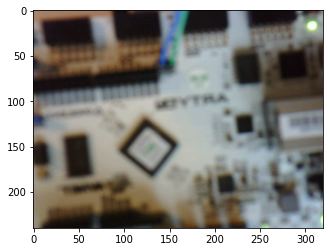

In [6]:
fifo_length = storeimg(ser)
fifo_length = (int(fifo_length[0],16)<<16) + (int(fifo_length[1],16)<<8) + (int(fifo_length[2],16)<<0)  
print (fifo_length)
data = readimg(ser,150,240,320)
if (fifo_length > 0):
    a = getImage(data, 240, 320, 1)
    plt.imshow(a)